In [1]:
import pandas as pd
import numpy as np
import hdbscan
import glob
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import utm

In [2]:
cd C:\Users\dakot\Documents\Trees\Analysis\Final Spreadsheets

C:\Users\dakot\Documents\Trees\Analysis\Final Spreadsheets


In [3]:
## df1 is complete
#df1[~df1.isin(df2)].dropna()
#df_all = df1.merge(df2.drop_duplicates(), on=['col1','col2'], 
#                   how='left', indicator=True)
#df_all[df_all['_merge'] == 'left_only']

set inline plots to be big 

In [4]:
plt.rcParams['figure.figsize'] = [3,3]
plt.ioff()

In [5]:
cd C:\Users\dakot\Documents\Trees\Analysis\Final Spreadsheets

C:\Users\dakot\Documents\Trees\Analysis\Final Spreadsheets


In [6]:
csv_files = glob.glob('*.csv')
print(csv_files)

['Albuquerque_Final_2021-09-22.csv', 'Anaheim_Final_2021-09-22.csv', 'Arlington_Final_2021-09-22.csv', 'Atlanta_Final_2021-09-22.csv', 'AuroraCO_Final_2021-09-22.csv', 'Austin_Final_2021-09-22.csv', 'Baltimore_Final_2021-09-22.csv', 'Boston_Final_2021-09-22.csv', 'Buffalo_Final_2021-09-22.csv', 'CapeCoral_Final_2021-09-22.csv', 'ColoradoSprings_Final_2021-09-22.csv', 'Columbus_Final_2021-09-22.csv', 'Dallas_Final_2021-09-22.csv', 'Denver_Final_2021-09-22.csv', 'DesMoines_Final_2021-09-22.csv', 'Detroit_Final_2021-09-22.csv', 'Durham_Final_2021-09-22.csv', 'Fresno_Final_2021-09-22.csv', 'GardenGrove_Final_2021-09-22.csv', 'GrandRapids_Final_2021-09-22.csv', 'Greensboro_Final_2021-09-22.csv', 'Honolulu_Final_2021-09-22.csv', 'Houston_Final_2021-09-22.csv', 'HuntingtonBeach_Final_2021-09-22.csv', 'Indianapolis_Final_2021-09-22.csv', 'Irvine_Final_2021-09-22.csv', 'Jerseycity_Final_2021-09-22.csv', 'Knoxville_Final_2021-09-22.csv', 'LasVegas_Final_2021-09-22.csv', 'LosAngeles_Final_2021-09

# GOOD ONE IS HERE

In [7]:
lambdafunc = lambda x: pd.Series(utm.from_latlon(x['latitude_coordinate'], x['longitude_coordinate'])[:2])


In [8]:
lambdafunc = lambda x: pd.Series(utm.from_latlon(x['latitude_coordinate'], x['longitude_coordinate'])[:2])

for i in range(len(csv_files)):
    ## read file
    data_all=pd.read_csv(csv_files[i])

    ## save cityname
    cityname = csv_files[i].split('_')[0]

    ## set lat and long to numeric
    data_all['latitude_coordinate']=pd.to_numeric(data_all['latitude_coordinate'], errors='coerce')
    data_all['longitude_coordinate']=pd.to_numeric(data_all['longitude_coordinate'], errors='coerce')
    data_all=data_all[data_all["latitude_coordinate"].notnull()]
    data_all=data_all[data_all["longitude_coordinate"].notnull()]
    
    ## filter bad points
    if cityname!="Honolulu":
        ## filter lat and long coordinates that are not in continental USA
        data_all=data_all[data_all.latitude_coordinate.between(24.396308, 49.384358)]
        data_all=data_all[data_all.longitude_coordinate.between(-124.848974,-66.885444)]
    if cityname=="Honolulu":
        ## filter lat and long coordinates that are not in continental USA
        data_all=data_all[data_all.latitude_coordinate.between(18.910361,28.402123)]
        data_all=data_all[data_all.longitude_coordinate.between(-178.334698,-154.806773)]

    ## save data
    data=data_all[['latitude_coordinate', 'longitude_coordinate']]
    
    ## convert to UTM
    data_utm = data.apply((lambdafunc), axis=1)
    data_utm.columns = ['utm_lat', 'utm_long']
    data_utm

    ## apply clustering
    if len(data_utm)>0:
        clusterer = hdbscan.HDBSCAN(min_cluster_size=30,
                                            min_samples=10,
                                            metric='manhattan',
                                            cluster_selection_epsilon=0.0004,
                                            cluster_selection_method = 'eom').fit(data_utm)

        ## plot
        color_palette = sns.color_palette('deep', clusterer.labels_.max()+1)
        cluster_colors = [color_palette[x] if x >= 0
                                  else (0.5, 0.5, 0.5)
                                  for x in clusterer.labels_]
        cluster_member_colors = [sns.desaturate(x, p) for x, p in
                                         zip(cluster_colors, clusterer.probabilities_)]
        fig=plt.scatter(data_utm.utm_lat, data_utm.utm_long, 
                            linewidth=0, s=0.5, c=cluster_member_colors, alpha=0.25).figure

        ## save new dataframe with cluster assignments
        path='C:/Users/dakot/Documents/Trees/Figures/ClusterPlots/'
        fig.savefig(path +'\\' + cityname+'.png',dpi=300)
        fig.clear()
        plt.close(fig)
        print(cityname)
        print(len(data))
        ##
        ### make csv with cluster assignments
        probs=pd.DataFrame(clusterer.probabilities_)
        probs.columns = ['cluster_probability']
        clusters=pd.DataFrame(clusterer.labels_)
        clusters.columns = ['cluster']
        frames = [data_all, clusters, probs]
        result = pd.concat(frames,axis=1)
        result
        path_csvs='C:/Users/dakot/Documents/Trees/Analysis/Clustered CSVs/'
        result.to_csv(path_csvs + '\\'+ cityname + '_clusters.csv',index=False)
    ## for cluster bigger than certain value, redo clustering for that value

Albuquerque
2502
Anaheim
72719
Arlington
14827
Atlanta
41307
AuroraCO
57658
Austin
7295
Baltimore
121296
Buffalo
132994
CapeCoral
34287
ColoradoSprings
25478
Columbus
151936
Denver
284737
DesMoines
16875
Detroit
20963
Durham
16030
GardenGrove
17522
Greensboro
6589
Honolulu
15435


C:\Users\dakot\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Houston
215020
HuntingtonBeach
55653


C:\Users\dakot\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Knoxville
9999
LasVegas
39193


C:\Users\dakot\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


LosAngeles
462740
Louisville
32711
Madison
96042
Milwaukee
32260


C:\Users\dakot\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Minneapolis
190766
Nashville
2059
NewYork
683788
Oakland
38608
OklahomaCity
10000
Ontario
58577
OverlandPark
45148
Pittsburgh
45452
Portland
218602
Providence
22745
RanchoCucamonga
82947
Rochester
63993
Sacramento
87010
SanDiego
18390
SanFrancisco
185807
SanJose
14236
SantaRosa
3016
Seattle
165623
SiouxFalls
61961
StLouis
83594
Stockton
98300
Tampa
25501
WashingtonDC
190989


In [9]:
## second half

## Everything Below Here Is Scratch Work I Think

In [8]:
lambdafunc = lambda x: pd.Series(utm.from_latlon(x['latitude_coordinate'], x['longitude_coordinate'])[:2])

for i in range(37,len(csv_files)):
    ## read file
    data_all=pd.read_csv(csv_files[i])

    ## save cityname
    cityname = csv_files[i].split('_')[0]

    ## set lat and long to numeric
    data_all['latitude_coordinate']=pd.to_numeric(data_all['latitude_coordinate'], errors='coerce')
    data_all['longitude_coordinate']=pd.to_numeric(data_all['longitude_coordinate'], errors='coerce')
    data_all=data_all[data_all["latitude_coordinate"].notnull()]
    data_all=data_all[data_all["longitude_coordinate"].notnull()]
    
    ## filter bad points
    if cityname!="Honolulu":
        ## filter lat and long coordinates that are not in continental USA
        data_all=data_all[data_all.latitude_coordinate.between(24.396308, 49.384358)]
        data_all=data_all[data_all.longitude_coordinate.between(-124.848974,-66.885444)]
    if cityname=="Honolulu":
        ## filter lat and long coordinates that are not in continental USA
        data_all=data_all[data_all.latitude_coordinate.between(18.910361,28.402123)]
        data_all=data_all[data_all.longitude_coordinate.between(-178.334698,-154.806773)]

    ## save data
    data=data_all[['latitude_coordinate', 'longitude_coordinate']]
    
    ## convert to UTM
    data_utm = data.apply((lambdafunc), axis=1)
    data_utm.columns = ['utm_lat', 'utm_long']
    data_utm

    ## apply clustering
    if len(data_utm)>0:
        clusterer = hdbscan.HDBSCAN(min_cluster_size=30,
                                            min_samples=10,
                                            metric='manhattan',
                                            cluster_selection_epsilon=0.0004,
                                            cluster_selection_method = 'eom').fit(data_utm)

        ## plot
        color_palette = sns.color_palette('deep', clusterer.labels_.max()+1)
        cluster_colors = [color_palette[x] if x >= 0
                                  else (0.5, 0.5, 0.5)
                                  for x in clusterer.labels_]
        cluster_member_colors = [sns.desaturate(x, p) for x, p in
                                         zip(cluster_colors, clusterer.probabilities_)]
        fig=plt.scatter(data_utm.utm_lat, data_utm.utm_long, 
                            linewidth=0, s=0.5, c=cluster_member_colors, alpha=0.25).figure

        ## save new dataframe with cluster assignments
        path='C:/Users/dakot/Documents/Trees/Figures/ClusterPlots/'
        fig.savefig(path +'\\' + cityname+'.png',dpi=300)
        fig.clear()
        plt.close(fig)
        print(cityname)
        print(len(data))
        ##
        ### make csv with cluster assignments
        probs=pd.DataFrame(clusterer.probabilities_)
        probs.columns = ['cluster_probability']
        clusters=pd.DataFrame(clusterer.labels_)
        clusters.columns = ['cluster']
        frames = [data_all, clusters, probs]
        result = pd.concat(frames,axis=1)
        result
        path_csvs='C:/Users/dakot/Documents/Trees/Analysis/Clustered CSVs/'
        result.to_csv(path_csvs + '\\'+ cityname + '_clusters.csv',index=False)
    ## for cluster bigger than certain value, redo clustering for that value

NewYork
683788
OklahomaCity
10000
Pittsburgh
45452
Portland
218602
Providence
22745
RanchoCucamonga
82947
SanDiego
18390
SanFrancisco
185807
SanJose
14236
SantaRosa
3016
Seattle
165623
SiouxFalls
61961
StLouis
83594
Tampa
25501
WashingtonDC
190989


In [6]:
pd.to_numeric(data_all['latitude_coordinate'], errors='coerce')

Series([], Name: latitude_coordinate, dtype: float64)

In [10]:
range(len(csv_files))

range(0, 63)

In [31]:
fig=plt.scatter(data.latitude_coordinate, data.longitude_coordinate, 
                    linewidth=0, s=5, c=cluster_member_colors, alpha=0.25).figure

## save new dataframe with cluster assignments
path='C:/Users/dakot/Documents/Trees/Figures/ClusterPlots/'
fig.savefig(path +'\\' + cityname+'.png',dpi=300)
fig.clear()
plt.close(fig)

In [226]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=30,
                            min_samples=10,
                            metric='manhattan',
                            cluster_selection_epsilon=0.0003,
                            cluster_selection_method = 'eom').fit(data)
clusterer.labels_.max()

377

The hdbscan library implements soft clustering, where each data point is assigned a cluster membership score ranging from 0.0 to 1.0. A score of 0.0 represents a sample that is not in the cluster at all (all noise points will get this score) while a score of 1.0 represents a sample that is at the heart of the cluster (note that this is not the spatial centroid notion of core). You can access these scores via the probabilities_ attribute.

Set color palette based on total number of clusters (clusterer.labels_.max())

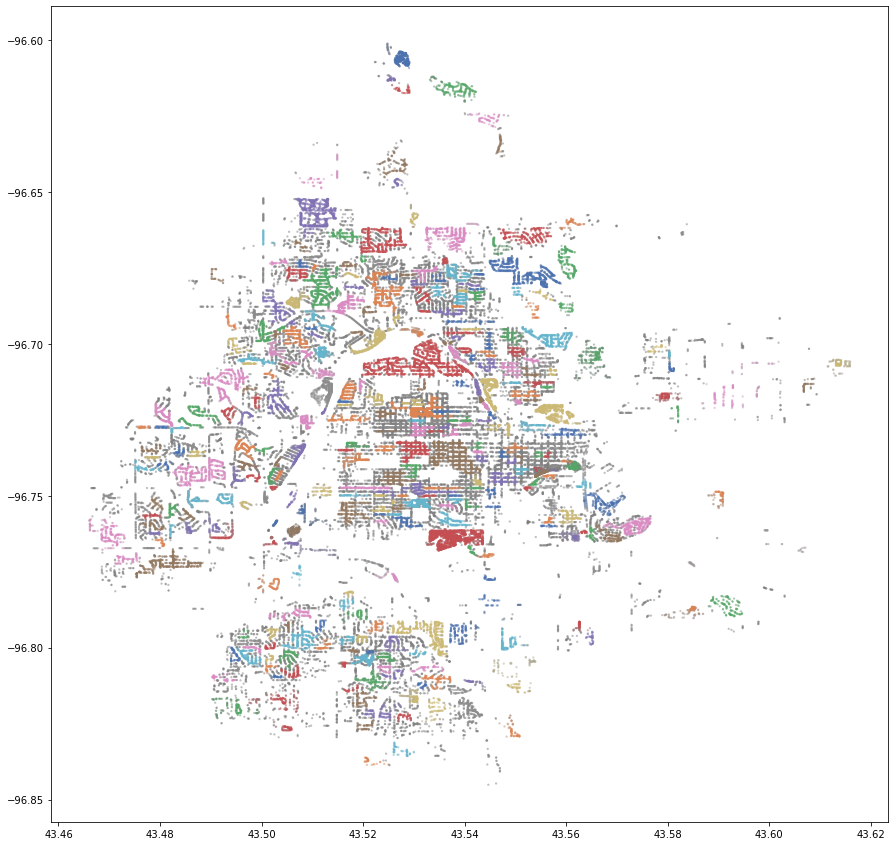

In [238]:
color_palette = sns.color_palette('deep', clusterer.labels_.max()+1)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]

fig=plt.scatter(data.latitude_coordinate, data.longitude_coordinate, 
            linewidth=0, s=5, c=cluster_member_colors, alpha=0.5)

path='C:/Users/dakot/Documents/Trees/Figures/ClusterPlots/'

fig.figure.savefig(path +'\\' + csv_files[1]+'.png')


In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)